In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load boston pricing datatset

In [101]:
dataset = pd.read_csv(r"C:\Users\avina\Downloads\END TO END\BostonHousing.csv")

In [102]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Preparing the Dataset

In [104]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [105]:
## Check the missing values
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [106]:
## EDA

dataset.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


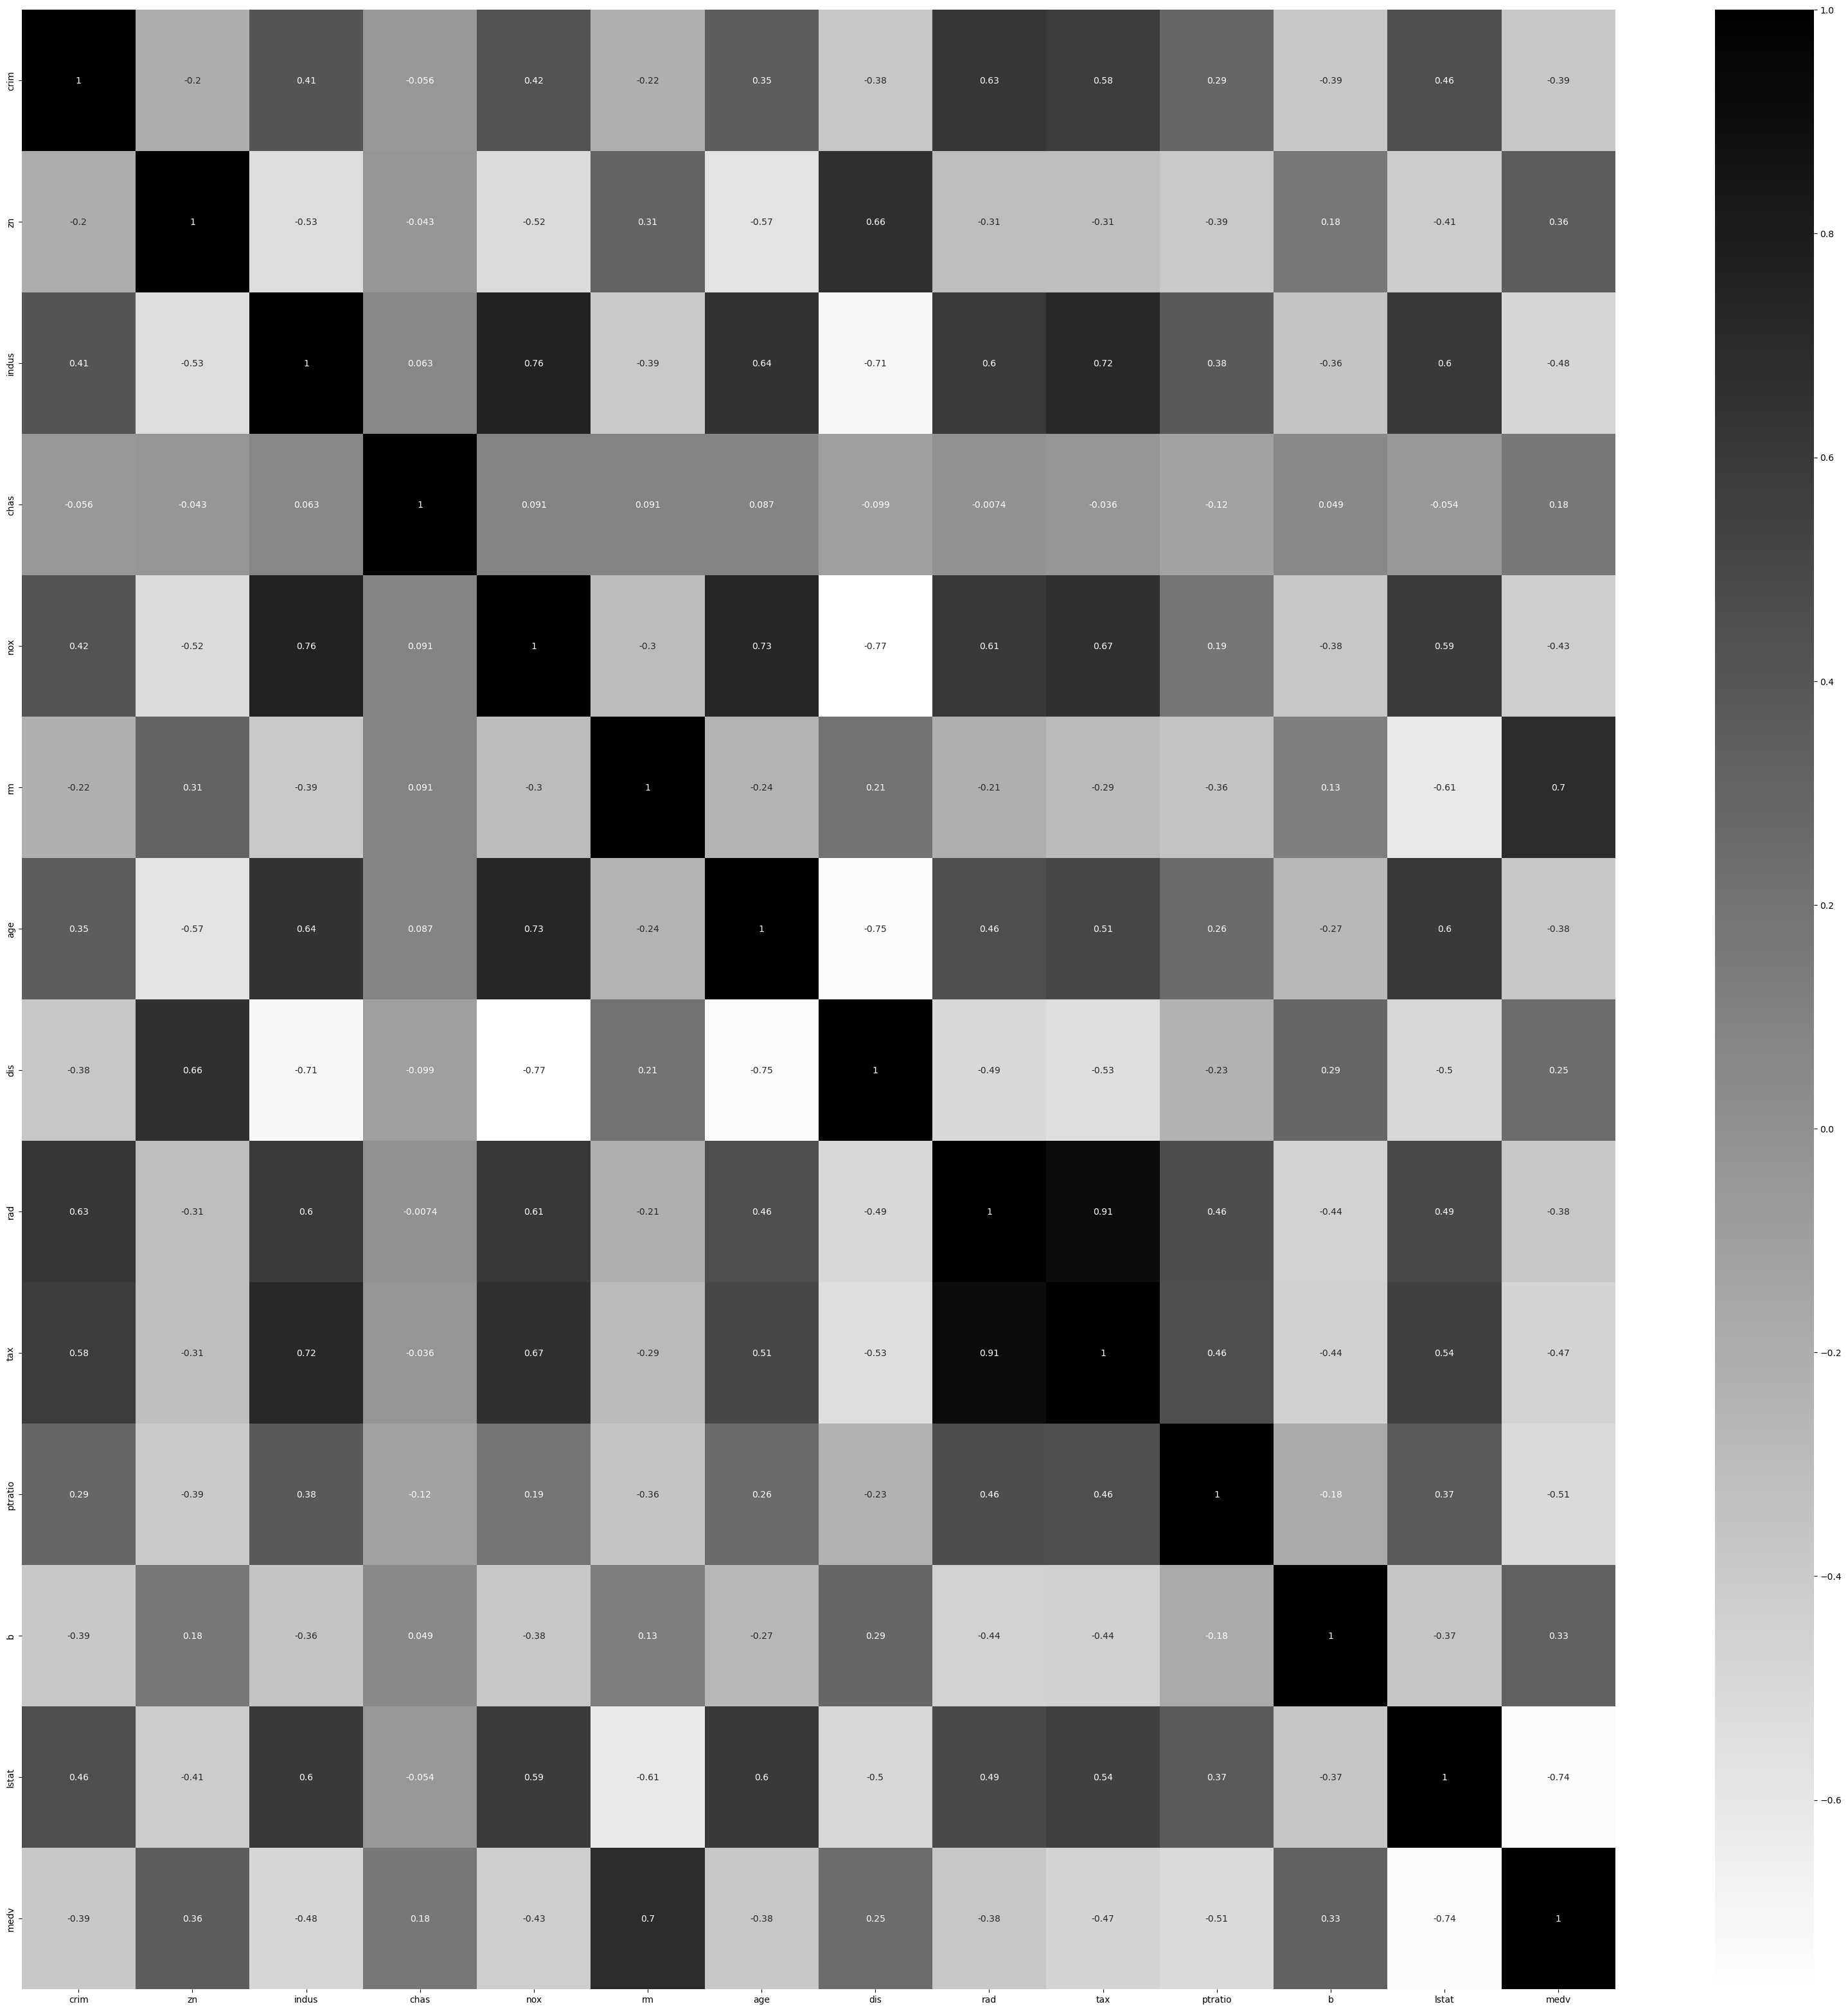

In [107]:
fig= plt.figure(figsize=(40,40))
sns.heatmap(dataset.corr(),cmap='binary',annot=True)
plt.show()

Text(0, 0.5, 'House price')

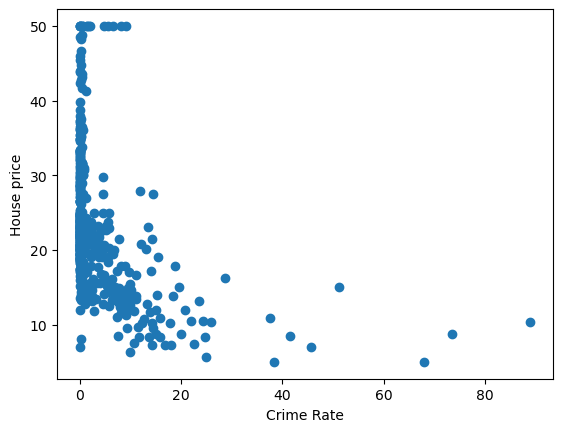

In [108]:
plt.scatter(dataset['crim'],dataset['medv'])
plt.xlabel("Crime Rate")
plt.ylabel("House price")

Text(0, 0.5, 'House price')

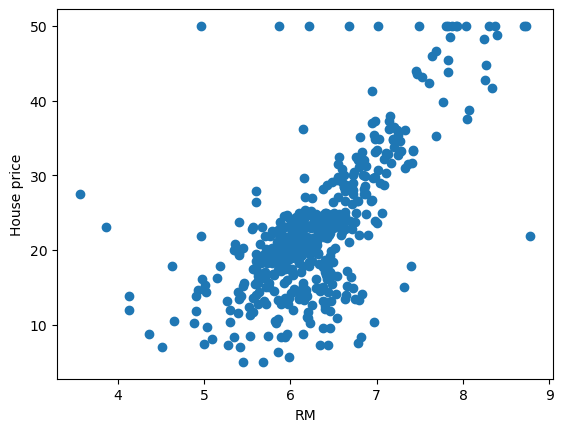

In [109]:
plt.scatter(dataset['rm'],dataset['medv'])
plt.xlabel("RM")
plt.ylabel("House price")

<Axes: xlabel='rm', ylabel='medv'>

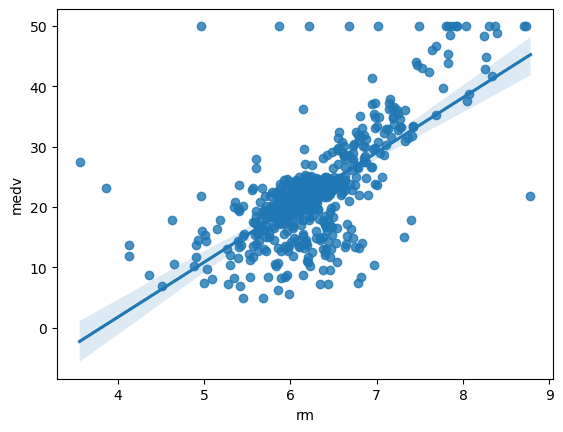

In [110]:
sns.regplot(x='rm',y='medv', data=dataset)

<Axes: xlabel='lstat', ylabel='medv'>

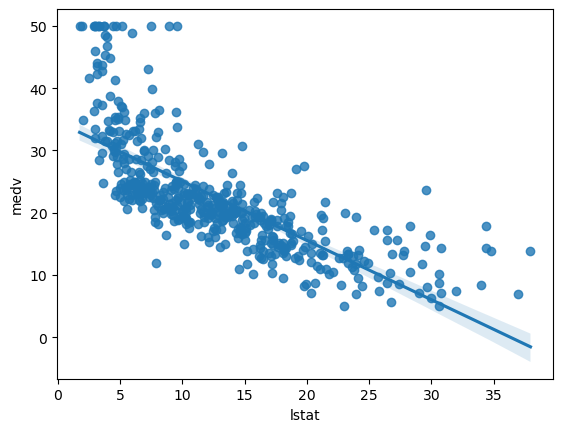

In [111]:
sns.regplot(x='lstat',y='medv', data=dataset)

In [112]:
# Dividing independent and dependent features

X= dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]

In [113]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state= 40)

In [114]:
## standardizing datatset

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [115]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Pickling Scalar

In [117]:
import pickle

pickle.dump(scaler,open('scaling.pkl','wb'))


## Model Training

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regression = LinearRegression()

In [33]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
## print coefficients and intercept
print(regression.coef_)
print(regression.intercept_)

[-0.6208519   0.89604528 -0.4181019   0.85794528 -1.98345156  2.34054146
 -0.14708338 -2.8644969   2.15413705 -1.58410776 -1.74439973  0.6305477
 -3.22010917]
22.331355932203394


In [35]:
## on which parameters the model has been trained
regression.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [36]:
## Prediction
reg_pred = regression.predict(X_test)

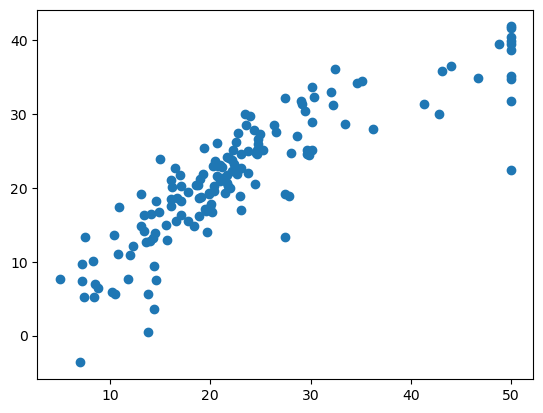

In [37]:
## PLot scatter plot for prediction
plt.scatter(y_test,reg_pred)

In [38]:
## residuals
residuals = y_test-reg_pred

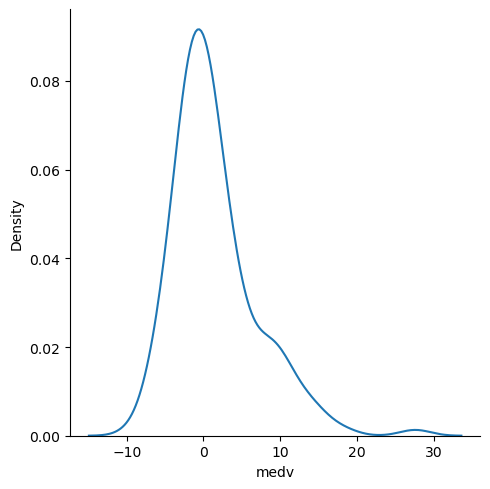

In [39]:
# plotting residuals

sns.displot(residuals, kind="kde")

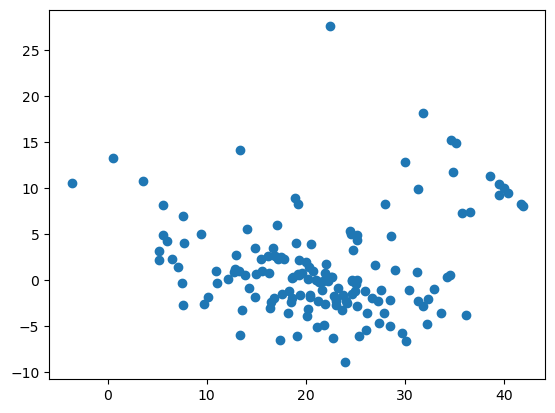

In [40]:
## Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals)

In [66]:
## performace metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

3.9079661456255192
31.829631155557475
5.641775532184657


In [42]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.7215519718844172

In [43]:
## Display adjusted R-squared

1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6953213605401957

In [55]:
X_train.shape

(354, 13)

In [56]:
#transformation of new data
scaler.transform((X_train))

c:\Users\avina\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.55051442, -0.476271  , -1.7189658 , ..., -8.8595524 ,
        -3.82058423, -2.01295304],
       [ 0.8273024 , -0.52412635, -1.4397134 , ..., -8.73855185,
        -3.86549396, -1.93568228],
       [-0.40041987, -0.52412635, -1.4397134 , ..., -8.73855185,
        -3.82030765, -1.99203049],
       ...,
       [-0.55078197, -0.50019867, -1.65997185, ..., -9.94855732,
        -3.81986443, -1.72075071],
       [-0.55160086, -0.52412635, -1.5303574 , ..., -9.65815601,
        -3.82023011, -1.92640979],
       [-0.54648702, -0.52412635, -1.67052186, ..., -8.88375251,
        -3.81986443, -2.02983372]])

In [97]:
regression.predict(scaler.transform(X_train[0,:].reshape(1,-1)))

c:\Users\avina\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([45.95745902])

In [99]:
y_test[0]

24.0

# Pickling The Model file for Deployment

In [59]:
import pickle

In [61]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [62]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [63]:
## Prediction
pickled_model.predict(scaler.transform(X_train))

c:\Users\avina\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 4.59574590e+01,  2.47293285e+01,  4.01351356e+01,  5.21314456e+01,
        5.24018657e+01,  1.02305512e+01,  9.03708008e-01,  4.90783600e+01,
        2.27608006e+01,  5.61665326e+01,  5.30878856e+00,  5.58739174e+01,
        3.65827859e+01,  4.80881044e+01,  1.58441516e+01,  2.63837088e+01,
        3.88380192e+01,  3.29694945e+01,  5.49356636e+01,  2.66281985e+01,
        5.95196640e+01,  5.87549160e+01,  1.81419322e+01,  1.57403318e+01,
        5.44008346e+01,  2.30710495e+01,  4.89979221e+01,  4.23457735e+01,
        3.59743835e+01,  4.14232126e+01,  2.43016884e+01,  2.34357754e+01,
       -1.66391411e+01,  4.32269942e+01,  4.89029578e+01,  2.99612660e+01,
        5.40934327e+01,  3.30604349e+01,  1.49262070e+00,  4.31790334e+01,
        5.10240739e+01,  4.89458333e+01,  4.55272191e+01,  4.69550870e+01,
        3.44972377e+01,  5.65795913e+01,  3.24203097e+01,  4.45784747e+01,
        5.05139678e+01,  5.35760104e+01,  5.73805749e+01,  8.96741988e+00,
        1.18024552e+01,  